## ベクトル

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
def plot_core(plotfunc, r=(0,0)):
    plt.axes(aspect='equal')
    
    plotfunc()

    if r != (0,0):
        plt.xlim([r[0], r[1]])
        plt.ylim([r[0], r[1]])
    
    plt.grid(True)

    
def plot_qs(qs, r=(0,0)):   
    us = [q[0] for q in qs]
    vs = [q[1] for q in qs]    
    plot_core(lambda: plt.quiver(0,0,us,vs,angles='xy',scale_units='xy',scale=1), r)

    
def plot_ps(ps, r=(0,0)):
    xs = [p[0] for p in ps]
    ys = [p[1] for p in ps]
    plot_core(lambda: plt.scatter(xs, ys), r)

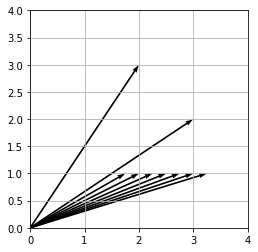

In [4]:
l=[[2,3],[3,2],[1.75,1],[2,1],[2.25,1],[2.5,1],[2.75,1],[3,1],[3.25,1]]
plot_qs(l, (0, 4))

In [5]:
def add2(v1, v2):
    return [v1[0]+v2[0], v1[1]+v2[1]]

# p83 クイズ 2.4.2
add2([4,4],[1,2])

[5, 6]

In [6]:
add2([-4,-4],[1,2])

[-3, -2]

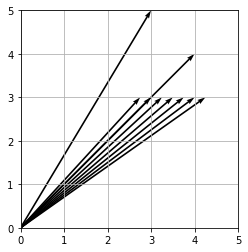

In [7]:
# p83 課題 2.4.3
plot_qs([add2(v, [1,2]) for v in l], (0,5))

In [8]:
# p83 クイズ 2.4.4
def addn(v, w):
    return [x + y for x, y in zip(v, w)]

addn([1,2,3,4], [5,6,7,8])

[6, 8, 10, 12]

In [9]:
# p87 クイズ 2.5.3
def scalar_vector_mult(alpha, v):
    return [alpha * x for x in v]

scalar_vector_mult(2, [1,2,3,4,5])

[2, 4, 6, 8, 10]

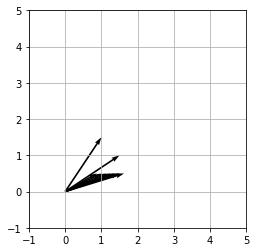

In [10]:
# p87 課題 2.5.4
plot_qs([scalar_vector_mult(0.5, x) for x in l], (-1,5))

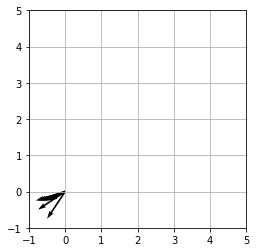

In [11]:
plot_qs([scalar_vector_mult(-0.5, scalar_vector_mult(0.5, x)) for x in l], (-1,5))

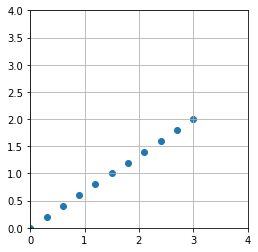

In [12]:
# 原点と(3,2)を通る線分（のサンプリング）
n = 10
plot_ps([scalar_vector_mult(a/n, [3, 2]) for a in range(n+1)], (0, 4))

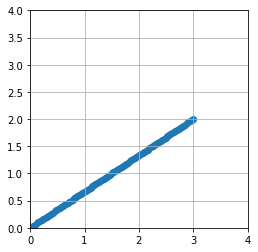

In [13]:
n = 100
plot_ps([scalar_vector_mult(a/n, [3, 2]) for a in range(n+1)], (0, 4))

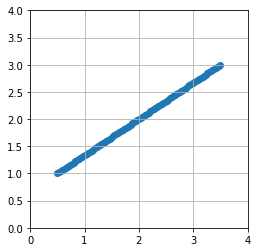

In [14]:
# (0.5,1)平行移動する
n = 100
plot_ps([add2(scalar_vector_mult(a/n, [3, 2]), [0.5, 1]) for a in range(n+1)], (0, 4))

In [15]:
# p93 練習問題 2.6.1
w = add2([5,7], [-2,-3])
w

[3, 4]

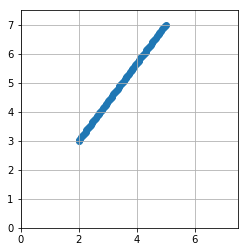

In [16]:
t = [2,3] # 平行移動ベクトル
n = 100
plot_ps([add2(scalar_vector_mult(a/n, w), t) for a in range(n+1)], (0, 7.5))

In [17]:
# p93 練習問題 2.6.2

$\mathbb{R}^2$ の点の組 $u, v$ をつなぐ線分を成す点の集合は
$$
\{\alpha(v-u) + u: \alpha \in \mathbb{R}, 0 \leq \alpha \leq 1\}
$$
$u=(1,4), v=(6,3)$ のとき
$$
\{\alpha(5,-1) + (1,4): \alpha \in \mathbb{R}, 0 \leq \alpha \leq 1\}
$$

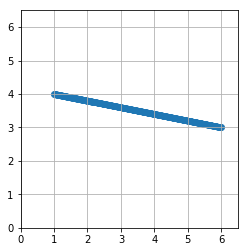

In [18]:
# 有限個の点でサンプリング
plot_ps([add2(scalar_vector_mult(a/n, [5,-1]), [1,4]) for a in range(n+1)], (0, 6.5))

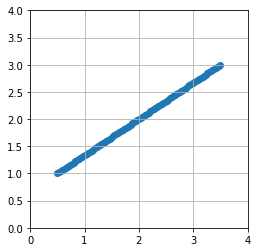

In [19]:
# p95 課題 2.6.9
def segment(pt1, pt2):
    n = 100
    return [add2(
        scalar_vector_mult(  a/n, pt1),
        scalar_vector_mult(1-a/n, pt2)
    ) for a in range(n+1)]

plot_ps(segment([3.5,3], [0.5,1]), (0,4))

In [20]:
class Vec:
    def __init__(self, labels, function):
        self.D = labels
        self.f = function

v = Vec(set('ABC'), {'A':1})
for d in v.D:
    if d in v.f:
        print(v.f[d])

1


In [21]:
# p97 クイズ 2.7.1
def zero_vec(D):
    return Vec(D, {})

In [22]:
def setitem(v, d, val):
    v.f[d] = val

# p97 クイズ 2.7.2
def getitem(v, d):
    return v.f[d] if d in v.f else 0

getitem(v, 'A')

1

In [23]:
# p98 クイズ 2.7.3
def scalar_mul(v, alpha):
    return Vec(v.D, {key: val * alpha for key, val in v.f.items()})

scalar_mul(v, 2).f

{'A': 2}

In [24]:
# p99 クイズ 2.7.4
def add(u, v):
    return Vec(u.D, {d: getitem(u, d) + getitem(v, d) for d in u.D})

u = Vec(set('ABC'), {'A':1, 'B':3})
add(u, v).f

{'A': 2, 'C': 0, 'B': 3}

In [25]:
# p100 クイズ 2.7.5
def neg(v):
    return scalar_mul(v, -1)
    
neg(v).f

{'A': -1}

In [26]:
# p103 問題 2.8.3

$GF(2)^n$ 上のベクトルを無作為に2個選んで $v_A,v_B$ とする。
共有する $n$ ビットの秘密を $v$ としたとき、次の式を用いて $v_C$ を求める。

$$
v_C=v+v_A+v_B
$$

3人のTAの一人目に $v_A$、二人目に $v_B$、三人目に $v_C$ を分け与え、休暇に出発する。
秘密のビットを再構築するには次の式を用いる。

$$
v=v_A+v_B+v_C
$$

$v_A,v_B$ が無作為なので $v_A+v_B$ も無作為なベクトルとなる。$GF(2)$ 上の加法が可逆なので、$v+v_A+v_B$ の結果は $v_A+v_B$ の分布を保存することになり $v_C$ も無作為なベクトルとなる。

したがって $v_A, v_B, v_C$ のうちいずれの2個を組み合わせても無作為なベクトルを作ることになり、秘密に関する情報は得られない。

例えば $v_A+v_C$ のベクトルを得たとして、その $k$ ビット目が $0$ でも $1$ でも残る $v_B$ の $k$ ビット目が $0$ である確率と $1$ である確率は等しいため、$v$ の $k$ ビット目に関して何も予測できない。

In [27]:
# p109 クイズ 2.9.3
def list_dot(u, v):
    return sum([ux*vx for ux, vx in zip(u, v)])

list_dot([1,1,1,1,1], [10,20,0,40,-100])

-30

In [28]:
# p115 クイズ 2.9.13
haystack = [1,-1,1,1, 1,-1,1,1,1]
needle   = [1,-1,1,1,-1, 1]
[list_dot(haystack[i:i+len(needle)], needle) for i in range(len(haystack) - len(needle) + 1)]

[2, 2, 0, 0]

In [29]:
# p124 問題 2.9.29
# 総当たりで解く
from itertools import chain, combinations
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

As = [0b110011, 0b101010, 0b111011, 0b001100]
Rs = [0, 0, 1, 1]
list(powerset(zip(As, Rs)))

[(),
 ((51, 0),),
 ((42, 0),),
 ((59, 1),),
 ((12, 1),),
 ((51, 0), (42, 0)),
 ((51, 0), (59, 1)),
 ((51, 0), (12, 1)),
 ((42, 0), (59, 1)),
 ((42, 0), (12, 1)),
 ((59, 1), (12, 1)),
 ((51, 0), (42, 0), (59, 1)),
 ((51, 0), (42, 0), (12, 1)),
 ((51, 0), (59, 1), (12, 1)),
 ((42, 0), (59, 1), (12, 1)),
 ((51, 0), (42, 0), (59, 1), (12, 1))]

In [34]:
from functools import reduce
from operator import xor

def reduce_pairs(f, pairs):
    fst = reduce(f, map(lambda p: p[0], pairs))
    snd = reduce(f, map(lambda p: p[1], pairs))
    return (fst, snd)

def print_vecs_for_crack(new_a):
    for ARs in powerset(zip(As, Rs)):
        if ARs == tuple():
            continue
        rd = reduce_pairs(xor, ARs)
        if (rd[0] == new_a):
            print([(format(rd[0], 'b').zfill(6), rd[1])])
            print([(format(a, 'b').zfill(6), r) for a, r in ARs])
            
print_vecs_for_crack(0b011101)

[('011101', 0)]
[('101010', 0), ('111011', 1), ('001100', 1)]


In [35]:
print_vecs_for_crack(0b000100)

[('000100', 0)]
[('110011', 0), ('111011', 1), ('001100', 1)]


In [42]:
# p127 クイズ 2.10.1
def list2vec(lst):
    return Vec(set(range(len(lst))), {k:x for k, x in enumerate(lst)})

vec = list2vec(list('ABCDEFG'))
vec.D

{0, 1, 2, 3, 4, 5, 6}

In [43]:
vec.f

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}

In [53]:
# p130 練習問題 2.11.4
# Vec クラスが整ってないのでリストを対象とする

def triangular_solve_n(rowlist, b):
    x = [0] * len(b)
    for i in reversed(range(len(b))):
        x[i] = (b[i] - list_dot(rowlist[i], x)) / rowlist[i][i]
    return x

triangular_solve_n([
    [2, 3, -4],
    [0, 1, 2],
    [0, 0, 5]
    ], [10, 3, 15])

[15.5, -3.0, 3.0]

In [56]:
triangular_solve_n([
    [1, -3, -2],
    [0, 2, 4],
    [0, 0, -10]
    ], [7, 4, 12])

[17.8, 4.4, -1.2]

In [96]:
# p133 課題 2.12.1
def create_voting_dict(strlist):
    return {cols[0]: list(map(lambda v: int(v), cols[3:])) for cols in [line.split(' ') for line in strlist]}

# テキストファイルは http://resources.codingthematrix.com/ から取得する
voting_record = list(open('voting_record_dump109.txt'))
voting_dict = create_voting_dict(voting_record)
voting_dict['Obama'][:10]

[1, -1, 1, 1, 1, -1, -1, -1, 1, 1]

In [97]:
# p133 課題 2.12.2
def policy_compare(sen_a, sen_b, voting_dict):
    return list_dot(voting_dict[sen_a], voting_dict[sen_b])

policy_compare('Obama', 'Levin', voting_dict)

32

In [98]:
# p134 課題 2.12.3
# 複数該当を考慮してリストで返す

def most_similar(sen, voting_dict, inverse=False):
    comp = [(name, policy_compare(sen, name, voting_dict)) for name in voting_dict.keys() if name != sen]
    comp.sort(key=lambda x: x[1], reverse=not inverse)
    result = [comp[0]]
    result + [t for t in comp[1:] if t[1] == comp[0][1]]
    return result

most_similar('Obama', voting_dict)

[('Kerry', 42)]

In [99]:
# p134 課題 2.12.4
def least_similar(sen, voting_dict):
    return most_similar(sen, voting_dict, inverse=True)

least_similar('Obama', voting_dict)

[('Sununu', 7)]

In [100]:
# p134 課題 2.12.5
most_similar('Chafee', voting_dict)

[('Jeffords', 40)]

In [101]:
least_similar('Santorum', voting_dict)

[('Feingold', 3)]

In [131]:
# p134 課題 2.12.7
def find_average_similarity(sen, sen_set, voting_dict):
    return sum(policy_compare(sen, x, voting_dict) for x in sen_set) / len(sen_set)

senators = [line.split(' ')[0] for line in voting_record]
democrats = {cols[0] for cols in [line.split(' ') for line in voting_record] if cols[1] == 'D'}

avr_for_d = [(sen, find_average_similarity(sen, democrats, voting_dict)) for sen in senators]
avr_for_d.sort(key=lambda p: p[1], reverse=True)
avr_for_d[:10]

[('Biden', 34.86046511627907),
 ('Durbin', 34.674418604651166),
 ('Sarbanes', 34.674418604651166),
 ('Dodd', 34.13953488372093),
 ('Kennedy', 33.674418604651166),
 ('Reid', 33.604651162790695),
 ('Mikulski', 33.23255813953488),
 ('Dayton', 33.18604651162791),
 ('Reed', 33.0),
 ('Levin', 32.72093023255814)]

In [149]:
# p134 課題 2.12.8
def find_average_record(sen_set, voting_dict):
    result = [0] * len(list(voting_dict.values())[0])
    for sen in sen_set:
        result = addn(result, voting_dict[sen])
    return scalar_vector_mult(1/len(sen_set), result)

average_democrat_record = find_average_record(democrats, voting_dict)
average_to_democrats = [(sen, list_dot(voting_dict[sen], average_democrat_record)) for sen in senators]
average_to_democrats.sort(key=lambda p: p[1], reverse=True)
average_to_democrats[:10]

[('Biden', 34.860465116279066),
 ('Durbin', 34.67441860465116),
 ('Sarbanes', 34.67441860465116),
 ('Dodd', 34.13953488372092),
 ('Kennedy', 33.67441860465116),
 ('Reid', 33.604651162790695),
 ('Mikulski', 33.23255813953488),
 ('Dayton', 33.1860465116279),
 ('Reed', 33.0),
 ('Levin', 32.72093023255814)]

In [134]:
# なぜ 2.12.7 と 2.12.8 が同じ結果になるか？

上院議員の投票記録のベクトルを $s_1, s_2, s_3, ...$ として、民主党員の投票記録のベクトルを $d_1, d_2, d_3, ...$ とする。

2.12.7 は上院議員一人毎に各民主党員のベクトルと内積を取っているので

$$
上院議員1人目\quad s_1\cdot d_1 + s_1\cdot d_2 + s_1\cdot d_3 + ...\\
上院議員2人目\quad s_2\cdot d_1 + s_2\cdot d_2 + s_2\cdot d_3 + ...\\
上院議員3人目\quad s_3\cdot d_1 + s_3\cdot d_2 + s_3\cdot d_3 + ...\\
...
$$

という計算を行っている。これらは内積の分配則 $x\cdot v_1 + x\cdot v_2=x\cdot (v_1+v_2)$ により共通項をくくり出して

$$
上院議員1人目\quad s_1\cdot (d_1 + d_2 + d_3 + ...)\\
上院議員2人目\quad s_2\cdot (d_1 + d_2 + d_3 + ...)\\
上院議員3人目\quad s_3\cdot (d_1 + d_2 + d_3 + ...)\\
...
$$

としても結果は同じであり、これが 2.12.8 の実装の元の式である。ただし、平均を求めるための除算のタイミングが変わるため、浮動小数点演算の丸め誤差の違いは出ている。

In [169]:
# p135 課題 2.12.9
def bitter_rivals(voting_dict):
    # least_similar を使うと (上院議員の数)^2 回の内積計算が必要になる。
    # dot(A, B) と dot(B, A) は内積の交換則より等価なので、
    # itertools.combinations で組み合わせを列挙してどちらか一方だけが計算されるようにする。
    senators = voting_dict.keys()
    pairs = [(pair, policy_compare(pair[0], pair[1], voting_dict)) for pair in combinations(senators, 2)]

    pairs.sort(key=lambda p: p[1])
    result = [pairs[0]]
    return result + [pair for pair in pairs[1:] if pairs[0][1] == pair[1]]

bitter_rivals(voting_dict)

[(('Feingold', 'Inhofe'), -3)]

In [179]:
# p135 2.12.7 さらなる課題

# マケインは本当に異端か？
average_all_senators = find_average_record(senators, voting_dict)
compared_with_average = [(sen, list_dot(voting_dict[sen], average_all_senators)) for sen in senators]
compared_with_average.sort(key=lambda p: p[1])

for sen in enumerate(compared_with_average):
    print(sen)
    if sen[1][0] == 'McCain':
        break
len(senators)

(0, ('Feingold', 14.101010101010104))
(1, ('Coburn', 18.676767676767675))
(2, ('Sununu', 21.17171717171717))
(3, ('Lieberman', 21.45454545454546))
(4, ('Leahy', 21.666666666666664))
(5, ('Akaka', 21.686868686868685))
(6, ('Inouye', 21.828282828282816))
(7, ('Harkin', 22.101010101010097))
(8, ('Boxer', 22.131313131313128))
(9, ('Inhofe', 22.383838383838388))
(10, ('Lautenberg', 22.929292929292927))
(11, ('McCain', 22.959595959595966))


99

In [180]:
# オバマは本当に過激か？
for sen in enumerate(compared_with_average):
    print(sen)
    if sen[1][0] == 'Obama':
        break

(0, ('Feingold', 14.101010101010104))
(1, ('Coburn', 18.676767676767675))
(2, ('Sununu', 21.17171717171717))
(3, ('Lieberman', 21.45454545454546))
(4, ('Leahy', 21.666666666666664))
(5, ('Akaka', 21.686868686868685))
(6, ('Inouye', 21.828282828282816))
(7, ('Harkin', 22.101010101010097))
(8, ('Boxer', 22.131313131313128))
(9, ('Inhofe', 22.383838383838388))
(10, ('Lautenberg', 22.929292929292927))
(11, ('McCain', 22.959595959595966))
(12, ('Levin', 22.96969696969696))
(13, ('Byrd', 23.202020202020194))
(14, ('Mikulski', 23.232323232323225))
(15, ('Reed', 23.272727272727266))
(16, ('Kennedy', 23.292929292929287))
(17, ('Kerry', 23.33333333333333))
(18, ('Durbin', 23.818181818181813))
(19, ('Sarbanes', 23.818181818181813))
(20, ('Rockefeller', 23.9090909090909))
(21, ('Wyden', 23.999999999999993))
(22, ('Dorgan', 24.828282828282823))
(23, ('Dayton', 24.92929292929292))
(24, ('Bingaman', 25.090909090909086))
(25, ('Murray', 25.121212121212118))
(26, ('Bayh', 25.232323232323225))
(27, ('Do